<div style="text-align: center">
<h2><font color="#004D7F" size=6>Code for minimalist neural networks training for phase classification in diluted Ising models</font></h2>




<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Lautaro Garcia Pavioni</font><br>

A paper of this investigation was published in the journal Computational Materials Science: https://authors.elsevier.com/c/1iSNk3In-v12Q4

 DOI:arxiv-2310.02122 


<h2><font color="#004D7F" size=5>Index</font></h2>
<a id="indice"></a>

* [1. Introduction](#section1)
    * [1.1. Understanding the problem: simple explanation of the Ising model](#section11)
    * [1.2. Objectives](#section12)
* [2. Synthetic data](#section2)
    * [2.1. Creating the synthetic data](#section21)
        * [2.1.1 Ferromagnetic state](#section211)
        * [2.1.2 Neel state](#section212)
        * [2.1.3 Stripes state](#section213)
        * [2.1.4 Paramagnetic state](#section214)
    * [2.2 Generating the synthetic data](#section22)
* [3. Minimal neural network](#section3)
    * [3.1 Training with synthetic data](#section31)
* [4. Phase classification of simulations with minimal neural network](#section4)
    * [4.1 Pure Ising model](#section41)
    * [4.2 Diluted Ising model](#section42)
* [5. Data analysis](#section5)
    * [5.1 Pure Ising model predictions analysis](#section51)
    * [5.2 Diluted Ising model predictions analysis](#section52)
    * [5.3 Percolation density](#section53)
* [6. Conclusions](#section6)


<a id="section1"></a>
# <font color="#004D7F"> 1. Introduction</font>

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Understanding the problem: simple explanation of the Ising model</font>

 The Ising model is a simplified representation used in physics, particularly in statistical mechanics, to study how certain materials behave at a basic level. It's named after the physicist Ernst Ising.

Imagine a material made up of tiny building blocks called **spins** in a fixed position called **site**. These spins are like little magnets that can point either up(+1) or down(-1), and they interact with their neighboring spins. The Ising model helps scientists understand how these interactions affect the overall behavior of the material.

One key concept is "phase transitions", where the material goes from one state to another, like from a solid to a liquid state. In the Ising model, the phase transition occurs at a specific temperature $T$ known as the **critical temperature** $T_c$. The phase transition occurs from the paramagnetic phase (spins are pointing up or down randomly, there is no order) when $T>T_c$ to the ferromagnetic phase (the spins are pointing either all up or down, there is order) when $T<T_c$.

The reason why at high temperatures the state of the Ising model is disordered (paramagnetic state) is because the thermal energy is greater than the interaction energy between the spins, which for high temperatures is negligible. If one decreases the temperature of the system until it reaches the point where the interaction energy between the spins is not negligible compared to the thermal energy, the spins begin to interact with each other, causing them to align, forming what is the ordered phase (ferromagnetic state). The temperature at which the interaction energy is no longer negligible compared to thermal energy is the one we already mentioned $Tc$.

An interesting and important concept that is studied is that if one removes spins from certain sites, the interaction energy would decrease (due to that there gonna be empty sites, then there are fewer spins to interact with one another), therefore the thermal energy is dominant over more temperatures, causing the critical temperature $T_c$ to decrease. The study of this is known as the **diluted Ising model**, and it has a very interesting result, which is when we remove many spins from the material, it happens that the interaction energy never exceeds the thermal energy, so there is no phase transition and for all temperatures $T$ the disordered state (the paramagnetic state) dominates. The low density of spins due to the empty sites when this occurs is called the **percolation density**.

By using the Ising model, and the diluted Ising model, scientists can simulate and analyze how these magnetic spins interact and influence these phase transitions. It's a simple yet powerful tool to explore the behavior of materials in certain conditions, providing insights into the properties of matter.


<a id="section12"></a>
## <font color="#004D7F"> 1.2. Objectives</font>

- Explore the potential of artificial neural networks, by training using an exceptionally simplified catalog of ideal configurations encompassing both order and disorder.
- Explore the generalization power of these networks to classify phases in complex models far from the simplified training context.
-  Obtain the determination of transition temperatures and percolation densities.

<a id="section2"></a>
# <font color="#004D7F"> 2. Code</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Creating the synthetic data </font>

Neel and stripes are other types of states that we can encounter in the Ising model, they are added in the catalog so the neural network training is more generic.

In [2]:
label={0:"ferromagnetic", 1:"neel", 2:"stripes", 3:"paramagnetic"}

Code for visualization of spins lattices data:

In [3]:
def plot_snap(filesnap,L):
   
    ra=np.array([1.,0])
    rb=np.array([0,1.])
    for mx in range(L):
        for my in range(L):
            rr1=mx*ra + my*rb
            c1=plt.Circle(rr1, radius=0.45,color=plt.cm.rainbow(filesnap[mx][my]*0.5+0.5),zorder=1 )
            plt.gca().add_artist(c1)

           
    plt.gca().set_aspect(1)    
    plt.tick_params(
    axis='both',
    which='both',       # both major and minor ticks are affected
    bottom=False,       # ticks along the bottom edge are off
    top=False,          #ticks along the top edge are off
    left=False, right=False,labelbottom=False,labelleft=False
    )
    plt.axis("off")
    plt.xlim(-0.5,L)
    plt.ylim(-0.5,L)
#     plt.rcParams["figure.figsize"] = (4,4)
    plt.show()

<a id="section211"></a>
### <font color="#004D7F"> 2.1.1 Ferromagnetic state</font>

As it has been mentioned before, the ferromagnetic state is the state where there is order in the spin configuration, so there are only two possible configurations:

In [4]:
 """ A matrix of size L*L is created with the configuration of the ferromagnetic state with spin=-1 (spin pointing down)"""
def red_ferromagnetic_0(L):
    red=[]

    for i in range(L):
        for j in range(L):
            red.append(-1)

    red=np.array(red)     
    red=red.reshape(L,L)  
    return red

[[-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]]


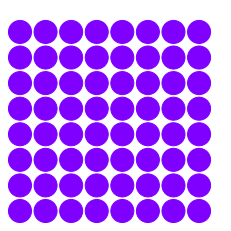

In [5]:
x=red_ferromagnetic_0(8)
print(x)
plot_snap(x,8)

In [6]:
 """ A matrix of size L*L is created with the configuration of the ferromagnetic state with spin=+1 (spin pointing up)"""
def red_ferromagnetic_1(L):
    red=[]

    for i in range(L):
        for j in range(L):
            red.append(1)

    red=np.array(red)     
    red=red.reshape(L,L) 
    return red

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]


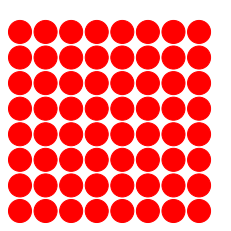

In [7]:
x=red_ferromagnetic_1(8)
print(x)
plot_snap(x,8)

<a id="section212"></a>
### <font color="#004D7F"> 2.1.2 Neel state</font>

In this configuration, neighbor spins point in opposite directions, so there are only two possible configurations:

In [8]:
 """ A matrix of size L*L is created with one posible type of the configuration for a Neel state"""
def neel_1(L):
    red=[]
 
    for i in range(L):
        for j in range(L):
            if i%2==0 and j%2==0:
                red.append(1)    
            elif i%2==0 and j%2!=0:
                red.append(-1)
            elif i%2!=0 and j%2==0:
                red.append(-1)
            else:
                red.append(1)


    red=np.array(red)
    red=red.reshape(L,L)
    return red
    

[[ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]]


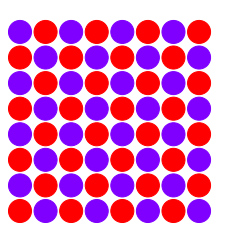

In [9]:
x=neel_1(8)
print(x)
plot_snap(x,8)

In [10]:
def neel_0(L):
    red=[]


    for i in range(L):
        for j in range(L):
            if i%2==0 and j%2==0:
                red.append(-1)
            elif i%2==0 and j%2!=0:
                red.append(1)
            elif i%2!=0 and j%2==0:
                red.append(1)
            else:
                red.append(-1)

    red=np.array(red)
    red=red.reshape(L,L)
    return red

[[-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1 -1]]


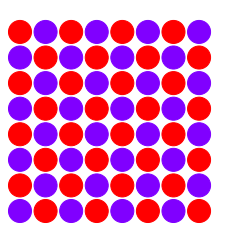

In [11]:
x=neel_0(8)
print(x)
plot_snap(x,8)

<a id="section213"></a>
### <font color="#004D7F"> 2.1.3 Stripes state</font>

In this configuration there are four posible configurations:

In [12]:

def stripes(L):
    """ me crea una red de stripes de tamaño LxL aleatoriamente en las 4 posibilidades """
    red=[]
    n= random.randint(0,3)
    if n==0:
        for i in range(L):
            for j in range(L):
                if i%2==0:
                    red.append(1)
                else:
                    red.append(-1)

    elif n==1:
        for i in range(L):
            for j in range(L):
                if i%2==0:
                    red.append(-1)
                else:
                    red.append(1)

    elif n==2:
        for i in range(L):
            for j in range(L):
                if j%2==0:
                    red.append(-1)
                else:
                    red.append(1)
    elif n==3:
        for i in range(L):
            for j in range(L):
                if j%2==0:
                    red.append(1)
                else:
                      red.append(-1)
    red=np.array(red)
    red=red.reshape(L,L)
    return red

[[ 1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1]]


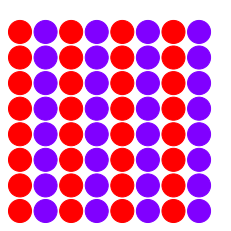

In [13]:
x=stripes(8)
print(x)
plot_snap(x,8)

<a id="section214"></a>
### <font color="#004D7F"> 2.1.4 Paramagnetic state</font>

As it has been mentioned before, paramagnetic state is the state where there is no order in the spin configuration due to the high temperature. Random configurations are made for this state:

In [14]:
def paramagnetic (L):
    red=[]
    for i in range(L):
        for j in range(L):
            red.append((random.randint(0,1))*2-1)

    red=np.array(red)
    red=red.reshape(L,L)
    return red

[[ 1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1  1 -1  1  1 -1  1]
 [ 1 -1  1  1 -1  1  1  1]
 [-1  1 -1  1 -1  1  1  1]
 [ 1  1 -1  1 -1 -1 -1  1]
 [ 1  1  1 -1 -1 -1 -1  1]
 [ 1 -1  1 -1  1 -1 -1 -1]
 [-1  1 -1  1 -1 -1  1 -1]]


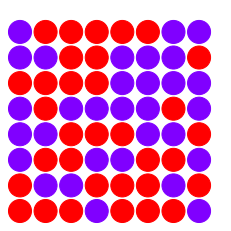

In [15]:
x= paramagnetic(8)
print(x)
plot_snap(x,8)

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Generating the synthetic data </font>

The function data_generator(c_e,L) returns us a vector train_images, which contains a quantity c_e of spin matrixes of different types of size LxL.

In [16]:
def data_generator(c_e,L):

  
    train_images=[]
    train_labels=[]  
    i=0

    for i in range(int(c_e/6)):
        red=red_ferromagnetic_0(L)
        train_images.append(red)
        train_labels.append(0)  

    for i in range(int(c_e/6)):
        red=red_ferromagnetic_1(L)
        train_images.append(red)
        train_labels.append(0)

    for i in range(int(c_e/6)):
        red=neel_1(L)
        train_images.append(red)
        train_labels.append(1)

    for i in range(int(c_e/6)):
        red=neel_0(L)
        train_images.append(red)
        train_labels.append(1)
        i+=1


    for i in range(int(c_e/6)):
        red=stripes(L)
        train_images.append(red)
        train_labels.append(2) 


    for i in range(int(c_e/6)):
        red=paramagnetic(L)
        train_images.append(red)
        train_labels.append(3)
        i+=1
  


    #The different types of matrixes have to be mixed in the training vector: the matrixes are put in
    #random order within the vector
    
    temp = list(zip(train_images, train_labels))
    random.shuffle(temp)
    train_images, train_labels = zip(*temp)
    train_images, train_labels= list(train_images), list(train_labels)

    return train_images, train_labels

We generate data simulating a disorder caused by a "temperature". We do this so we have some data for testing that is not in the training of the neural network, although this part for this investigation is irrelevant.

In [17]:
def data_generator_T(c_e,L,d):
    n=int(d*L*L/100) #numero de espines aleatorios
  
    test_images=[]
    test_labels=[]  
    i=0

    for i in range(int(c_e/6)):
        red=red_ferromagnetic_0(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(0)  

    for i in range(int(c_e/6)):
        red=red_ferromagnetic_1(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(0)

    for i in range(int(c_e/6)):
        red=neel_1(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(1)
    
    for i in range(int(c_e/6)):
        red=neel_0(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(1)
        i+=1

    for i in range(int(c_e/6)):
        red=stripes(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(2)
        i+=1

    for i in range(int(c_e/6)):
        red=paramagnetic(L)
        for j in range(n):
            x=random.randint(0,L-1)
            y=random.randint(0,L-1)
            red[x,y]=(random.randint(0,1))*2-1
        test_images.append(red)
        test_labels.append(3)
        i+=1

    temp = list(zip(test_images, test_labels))
    random.shuffle(temp)
    test_images, test_labels = zip(*temp)
    test_images, test_labels= list(test_images), list(test_labels)
    
    return test_images, test_labels

**Generate the data for training and testing the neural network:**

In [18]:
L= 40

In [19]:
train_images,train_labels= data_generator(9000,L)
test_images,test_labels=data_generator_T(1200,L,10) 

In [20]:
#data is convert to numpy array:
train_images=np.array(train_images)
train_labels=np.array(train_labels)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

<a id="section3"></a>
# <font color="#004D7F"> 3. Minimal neural network</font>

By the concept of minimalist neural networks we specifically refer to a training strategy by using a minimal set of configurations that represent ideal ordered or disordered patterns to train a feed-forward neural networks, such as Dense
Neural Networks (DNNs) with a single hidden layer.
The objective of this approach is to develop a trained neural network equipped with a diverse and extensible catalog of ideal configurations, capable of representing the impact of various types of couplings within multiple crystalline lattices, encompassing extreme values at both zero and infinite temperatures. Through this process, the neural network effectively learns to classify these limiting configurations and subsequently extends its capabilities to handle more complex configurations.

How can we evaluate the generalisation capability of the trained minimalist neural networks? One way is to face the task of classifying configurations that were not encountered during training. To achieve this, we employ diluted ferromagnetic Ising models on two-dimensional crystalline lattices: the square lattice. These models contain two essential ingredients that are not present in the ideal training configurations: finite temperature and dilution (vacancies).
By evaluating the network performance on these classification tasks, we can determine its ability to generalise and apply the learned knowledge to new situations.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Training with synthetic data</font>

In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(900, activation='relu', input_shape=(L*L,))) #512
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

c:\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 900)            │     1,440,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         3,604 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,444,504 (5.51 MB)

 Trainable params: 1,444,504 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

the images need to be reshape:

In [23]:
train_images = train_images.reshape((9000, L * L))
test_images = test_images.reshape((1200, L * L))

In [24]:
train_images.shape

(9000, 1600)

In [25]:
train_labels.shape

(9000,)

In [26]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9530 - loss: 0.1562
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 2.6433e-05
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 1.4707e-05


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.3210e-04
test_acc: 1.0


<a id="section4"></a>
# <font color="#004D7F"> 4. Phase classification of simulations with minimal neural network</font>

Monte Carlo simulations of the Ising model for a square lattice were performed. From these simulations, 300 simulations were obtained for each density $\rho$. The simulations were considered in the temperature range $T=[5;0.2]$, with intervals of $\Delta T=0.02$, that is, there are 250 temperature values, therefore, for each simulation there are 250 spin configurations for the AI to classify.

The densities considered were, $\rho=1$ in the pure case, and $\rho= 0.9, 0.8, 0.7, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.55$ for the diluted case. Here the training will be shown only for the pure case $\rho=1$, and the diluted case $\rho=0.8$; Keep in mind that the training was carried out for all the dilutions mentioned, and whose results were exported and will be imported later into the notebook.


<a id="section41"></a>
## <font color="#004D7F"> 4.1 Pure Ising model</font>

Import the data from the 300 simulations for $\rho=1$:

In [28]:
colnames=["red","T"]
datos_1=[]
images_simulacion_1=[]
for i in range(237):
  datos_1.append(pd.read_csv("data/test_images_p1_L40_"+str(i)+".txt", names=colnames, header=None))
  images_simulacion_1.append(np.array(datos_1[i].loc[:,"red"]))
  images_simulacion_1[i]=images_simulacion_1[i].reshape(251,L*L)

For each value of T, the phases in which the system is located at that temperature are predicted, and they are averaged among the other simulations.

In [29]:
predict_1= model.predict(images_simulacion_1[0])/len(images_simulacion_1)
for i in images_simulacion_1[:299]:
  predict_1 += model.predict(i)/len(images_simulacion_1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━

Export the avarage predecitions:

In [30]:
np.savetxt('predict_1_L40_1.txt', predict_1)

<a id="section42"></a>
## <font color="#004D7F"> 4.2 Diluted Ising model</font>

Import the data from the 300 simulations for $\rho=0.8$:

In [31]:
colnames=["red","T"]
datos_08=[]
images_simulacion_08=[]
for i in range(300):
  datos_08.append(pd.read_csv("data/test_images_p08_L40_"+str(i)+".txt", names=colnames, header=None))
  images_simulacion_08.append(np.array(datos_08[i].loc[:,"red"]))
  images_simulacion_08[i]=images_simulacion_08[i].reshape(251,L*L)

For each value of T, the phases in which the system is located at that temperature are predicted, and they are averaged among the other simulations.

In [32]:
predict_08= model.predict(images_simulacion_08[0])/len(images_simulacion_08)
for i in images_simulacion_08[1:]:
  predict_08 += model.predict(i)/len(images_simulacion_08)

1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━

Export the avarage predecitions:

In [33]:
np.savetxt('predict_08_L40_1.txt', predict_08)

<a id="section5"></a>
# <font color="#004D7F"> 5. Data analysis</font>

The prediction data made for each density is imported:

In [34]:
predict_055 = np.loadtxt('predict_055_L40.txt')
predict_06= np.loadtxt('predict_06_L40.txt')
predict_061= np.loadtxt('predict_061_L40.txt')
predict_062 = np.loadtxt('predict_062_L40.txt')
predict_063 = np.loadtxt('predict_063_L40.txt')
predict_064 = np.loadtxt('predict_064_L40.txt')
predict_065= np.loadtxt('predict_065_L40.txt')
predict_07= np.loadtxt('predict_07_L40.txt')
predict_08= np.loadtxt('predict_08_L40.txt')
predict_09 = np.loadtxt('predict_09_L40.txt')
predict_1 = np.loadtxt('predict_1_L40.txt')
Tc_s = np.loadtxt('Tc_s_L40.txt')

Temperatures from the simulations are imported:

In [35]:
colnames=["E","T","M","C.E","S"]
datT=pd.read_csv("data/datos_p055_L40_0.txt", names=colnames, header=None)
T=np.array(datT.loc[:,"T"])
T.shape
np.savetxt('T.txt', T)

<a id="section51"></a>
## <font color="#004D7F"> 5.1 Pure Ising model predictions analysis</font>

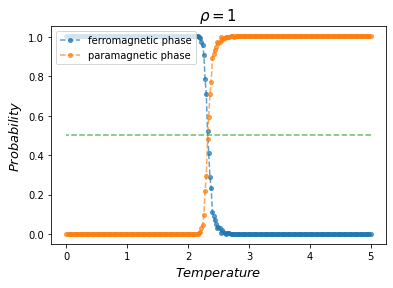

In [36]:
plt.plot(T,(predict_1[:,0]),"o--",alpha=0.7, markersize=4,label="ferromagnetic phase")
plt.plot(T,(predict_1[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
# plt.plot(T,predict_1[:,1],"o--",alpha=0.7, markersize=4) #this is the Neel phase, its always 0 for this case
# plt.plot(T,predict_1[:,2],"o--",alpha=0.7, markersize=4)  #this is the stripes phase, its always 0 for this case


#we make a line at probability prediction=0.5:
y=[]
for i in T:
  y.append(0.5)
plt.plot(T,y,"--",alpha=0.7, markersize=4)



plt.title(r"$\rho=1$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13)
plt.savefig("figpaper5b_L40_p1.pdf")

The predictions are the probabilities that the neural network assigns to finding the system in the ferromagnetic or paramagnetic phase at temperature $T$.

At high temperatures (far from the transition), the model exhibits the characteristics of the paramagnetic state (disordered). Therefore, using the available catalogue of ideal configurations, the neural network easily selects the random configuration. The same applies to the ordered states at low temperatures (on the other side of the transition), where the model displays a ferromagnetic character. 

As said before, the phase transition happens from the disordered phase (paramagnetic state) to the ordered phase (ferromagnetic state). Because the neural network to predicted the phase the system was in for each temperature, in the predictions that the probability is equal for the system been in the ferromagnetic state as it been in the paramagnetic state, it would be where it is occurring the phase transition, that is, the $T_c$.

So we need to find the value of temperature $T$, in which both predictions (the ferromagnetic and paramagnetic) are equal to 0.5 to obtain the $T_c$, where the phase transition is occurring:

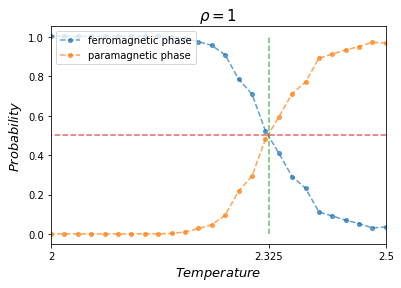

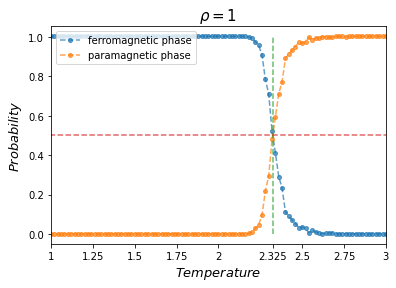

In [37]:
plt.plot(T,(predict_1[:,0]),"o--",alpha=0.7, markersize=4,label="ferromagnetic phase")
plt.plot(T,(predict_1[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((2.325, 2.325), (0, 1),"--",alpha=0.7, markersize=4)

y=[]
for i in T:
  y.append(0.5)
plt.plot(T,y,"--",alpha=0.7, markersize=4)

plt.xlim(2,2.5)

x_ticks=[2,2.325,2.5]
x_labels=[2,2.325,2.5]
plt.xticks(ticks=x_ticks, labels=x_labels)
# plt.tick_params(labelsize=13)
plt.title(r"$\rho=1$", size=15)
# plt.xlabel("$Temperature$")
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
plt.show()


plt.plot(T,(predict_1[:,0]),"o--",alpha=0.7, markersize=4,label="ferromagnetic phase")
plt.plot(T,(predict_1[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((2.325, 2.325), (0, 1),"--",alpha=0.7, markersize=4)

y=[]
for i in T:
  y.append(0.5)
plt.plot(T,y,"--",alpha=0.7, markersize=4)

plt.xlim(1,3)

x_ticks=[1,1.25,1.5,1.75,2,2.325,2.5,2.75,3]
x_labels=[1,1.25,1.5,1.75,2,2.325,2.5,2.75,3]
plt.xticks(ticks=x_ticks, labels=x_labels)
# plt.tick_params(labelsize=13)
plt.title(r"$\rho=1$", size=15)
# plt.xlabel("$Temperature$")
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
plt.show()


The critical temperature for the pure Ising model we obtained through the classification of the minimal neural network is $T_c=2.325$. Knowing from the bibliography that the analytical value is $T_c=2.269$, it can be concluded that the value obtained from the classification is good.

In [38]:
#we save the data for the critical temperatures obtained
Tc_o=[]
Tc_o.append(2.325)

<a id="section52"></a>
## <font color="#004D7F"> 5.2 Diluted Ising model predictions analysis</font>

The same analysis that was done for the pure case is performed for the diluted case:

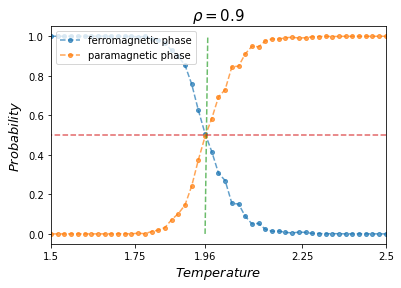

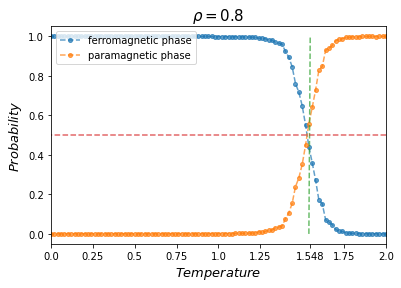

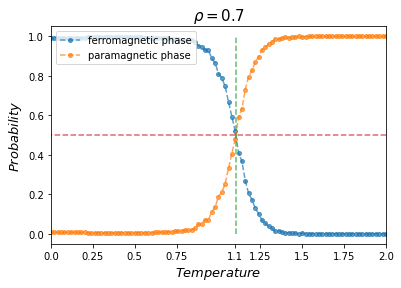

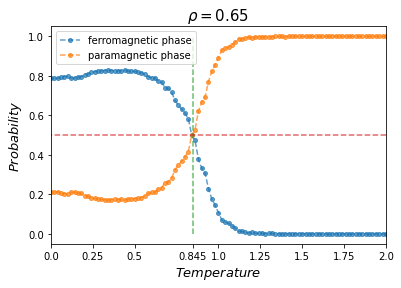

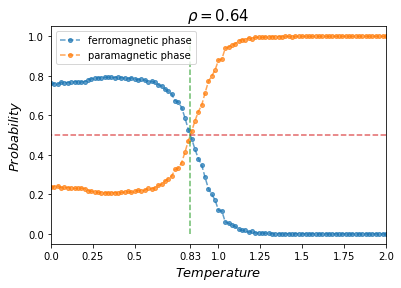

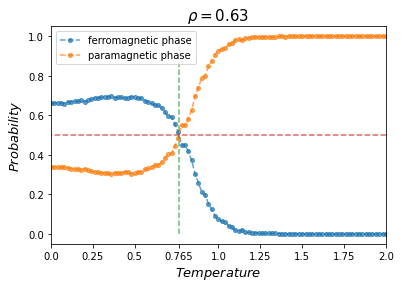

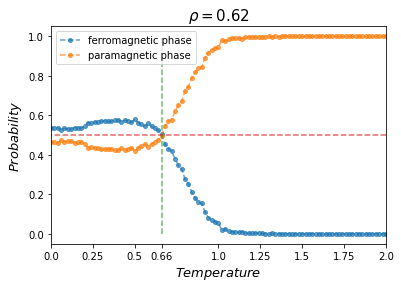

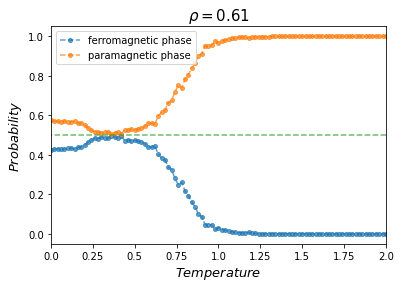

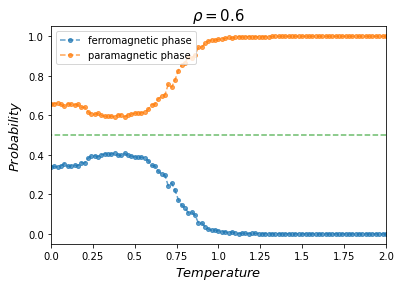

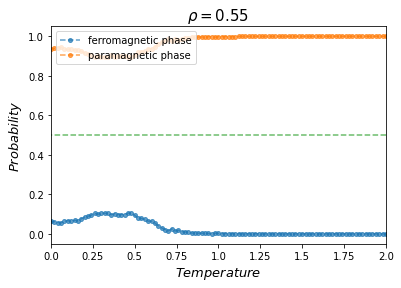

In [39]:
y=[]
for i in T:
  y.append(0.5)


plt.plot(T,(predict_09[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")             
plt.plot(T,(predict_09[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((1.96, 1.968), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(1.5,2.5)
x_ticks=[1.5,1.75,1.96,2.25,2.5]
x_labels=[1.5,1.75,1.96,2.25,2.5]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.9$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(1.96)
plt.show()


plt.plot(T,(predict_08[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_08[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((1.54, 1.548), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.75,1.00,1.25,1.548,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.75,1.00,1.25,1.548,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.8$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(1.54)
plt.show()


plt.plot(T,(predict_07[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_07[:,3]),"o--",alpha=0.7, markersize=4 ,label="paramagnetic phase")
plt.plot((1.104, 1.104), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.75,1.1,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.75,1.1,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.7$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(1.104)
plt.show()



plt.plot(T,(predict_065[:,0]),"o--",alpha=0.7, markersize=4,label="ferromagnetic phase")
plt.plot(T,(predict_065[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((0.845, 0.845), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.845,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.845,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.65$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0.845)
plt.show()



plt.plot(T,(predict_064[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_064[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((0.83, 0.83), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.83,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.83,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.64$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0.83)
plt.show()



plt.plot(T,(predict_063[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_063[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((0.765, 0.765), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.765,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.765,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.63$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0.765)
plt.show()



plt.plot(T,(predict_062[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_062[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot((0.66, 0.66), (0, 1),"--",alpha=0.7, markersize=4)
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.66,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.66,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.62$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0.66)
plt.show()



plt.plot(T,(predict_061[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_061[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.61$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0)
plt.show()


plt.plot(T,(predict_06[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase") 
plt.plot(T,(predict_06[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase") 
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.6$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0)
plt.show()


plt.plot(T,(predict_055[:,0]),"o--",alpha=0.7, markersize=4, label="ferromagnetic phase")
plt.plot(T,(predict_055[:,3]),"o--",alpha=0.7, markersize=4, label="paramagnetic phase")
plt.plot(T,y,"--",alpha=0.7, markersize=4)
plt.xlim(0,2)
x_ticks=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
x_labels=[0.00,0.25,0.50,0.75,1.00,1.25,1.5,1.75,2.00]
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title(r"$\rho=0.55$", size=15)
plt.xlabel("$Temperature$",fontsize=13)
plt.legend()
plt.legend(loc='upper left')
plt.ylabel("$Probability$",fontsize=13) 
Tc_o.append(0)
plt.show()





Phase transitions are observed at the higher densities, signaled by probability curve intersections. However, from $\rho=0.61$, no phase transition is observed, indicating a disordered state with Tc = 0, and the paramagnetic phase is dominant for all temperature. This suggests a percolation density for this lattice size around this value, close to the approximate theoretical value.

For the square lattice, it is established that the percolation density is
$\rho_c ≈ 0.5927$. This reference provides a basis for comparing the neural
network results when examining densities in proximity to the percolation
density.


<a id="section53"></a>
## <font color="#004D7F"> 5.3 Percolation density</font>

In the preceding section, we determined the critical temperatures ($T_c$) for several spin concentrations ($\rho$) using neural network classification. To facilitate comparison with alternative approaches, we plotted these $T_c(\rho)$ curves for each spin-lattice configuration previously obtained. The model proposed is expressed as follows found in existing literature:

\begin{equation}
    \frac{T_c(p)}{T_c(1)}= \frac{K}{\log(a-b(1-p))},
\end{equation}

Here, K, a, and b represent non-universal parameters subject to fitting, while
$\rho$ denotes the density of the spin lattice corresponding to the critical temperature $T_c$. The phase transition curve separates the ordered phase, located
below the curve, from the disordered phase, positioned above it, for each
type of spin lattice.

C:\Users\lauta\AppData\Local\Temp\ipykernel_16368\55614304.py:8: RuntimeWarning: invalid value encountered in log
  return -0.983 / np.log(x - 0.5927)


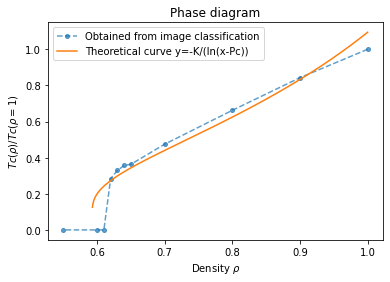

In [40]:
p=[1,0.9,0.8,0.7,0.65,0.64,0.63,0.62,0.61,0.6,0.55] 
Tc_o=np.array(Tc_o)
Tc_o/Tc_o[0]

plt.plot(p,Tc_o/Tc_o[0],"o--",alpha=0.7, markersize=4, label="Obtained from image classification")

def func(x):
    return -0.983 / np.log(x - 0.5927)

x = np.linspace(0.5, 1, 1000)
y = func(x)

plt.plot(x, y, '-', label="Theoretical curve y=-K/(ln(x-Pc))")


plt.title("Phase diagram")
plt.xlabel(r"Density $\rho$")
plt.legend()
plt.ylabel(r"$Tc(\rho)/Tc(\rho=1)$")
plt.show()

 Remarkably, the fitted value of $\rho_c$ from the data aligns closely with this literature value.
This agreement is noteworthy, given that the network was trained under
minimalist conditions, without vacancies or temperature considerations, and
without utilizing simulation data, all of which are far from the percolation
regime.


It's crucial to note that the simulated configurations are not employed in training the neural network; instead, their role is to validate and test the network's ability to generalize. In this context, the source of the data, whether from simulations or experiments, becomes insignificant. The neural network has already undergone training on a carefully selected dataset of ideal configurations and doesn't rely on these additional data during its training phase. 

<a id="section6"></a>
# <font color="#004D7F"> 6. Conclusions</font>

The order-disorder transition in dilute Ising models through
neural networks trained using a ‘minimalist’ approach was investigated.

The training process involved utilizing a basic catalog of configurations
that encompassed ideal ordered states at T = 0, along with random configurations representing the infinite-temperature paramagnetic phase. This
allowed the neural network to be trained on a variety of ideal configurations,
enabling it to effectively classify these synthetic samples.
By exploiting the generalization ability of the previously trained neural
networks, they were used to classify configurations obtained from Montecarlo
simulations corresponding to dilute Ising models. Since the neural network
was trained with a set of ideal configurations and does not rely on specific
data for training, this methodology allows the data to come from simulations
or experiments, without any difference.


The neural network, trained on very simple configurations, demonstrated the capacity to generalize and accurately classify the ordered and disordered phases.
Subsequently, vacancies were introduced into the spin lattices to increase
the complexity of the model. Remarkably, the minimalist neural network
displayed the capability to generalize and effectively classify the different configurations, even though it was never trained on spin lattices featuring
vacancies. The neural network exhibited its ability to generalize from ideal
spin lattice configurations to scenarios involving finite temperatures and diluted spin lattices.

Analysis of the temperature-dilution phase diagram of the dilute Ising
model, spanning paramagnetic and ferromagnetic phases, showed that the
transition curve obtained via the neural network is consistent with the expected approximate analytical predictions. This illustrates the power of minimalist neural networks to generalize and classify appropriately the different
phases of magnetic orders, for different values of temperature and dilution.